## Load forecast for today, compared to the actual load

In [1]:
# your access configuration:
config_file = 'access_config.json'

In [2]:
import datetime
import pytz
import requests
import pandas as pd
import json
import io

with open(config_file, 'r') as f: config = json.load(f)
addr = config['address']
folder = config['load_folder']

now = datetime.datetime.now()
today = pytz.timezone('US/Eastern').localize(now, is_dst=None).date()
print('Today:', today)

date_str = today.strftime('%Y-%m-%d')
url_crystalball24 = 'http://{0}/{1}/pred_{2}.csv'.format(addr, folder, date_str)
try:
    r = requests.get(url_crystalball24, timeout=5)
    with io.StringIO(r.text) as f:
        lf_data = pd.read_csv(f)
except:
    print('Problem with reading from Crystalball24.com')

Today: 2018-10-18


### Your predictions:

In [3]:
print(lf_data)

          date  hour    prediction       lf_miso
0   2018-10-18     1  62678.923242  64230.000000
1   2018-10-18     2  61325.596191  62930.000000
2   2018-10-18     3  60647.731836  62360.000000
3   2018-10-18     4  60878.631543  62650.000000
4   2018-10-18     5  61986.321680  63780.000000
5   2018-10-18     6  65798.088574  67800.000000
6   2018-10-18     7  71291.705957  73810.000000
7   2018-10-18     8  72985.619531  75420.000000
8   2018-10-18     9  73405.015869  75570.000000
9   2018-10-18    10  73792.529053  75590.000000
10  2018-10-18    11  73817.864771  75500.000000
11  2018-10-18    12  73558.116479  75050.000000
12  2018-10-18    13  73253.838867  74610.000000
13  2018-10-18    14  72932.866162  74210.000000
14  2018-10-18    15  72382.995825  73520.000000
15  2018-10-18    16  71907.927900  72929.999992
16  2018-10-18    17  71902.283713  72959.999996
17  2018-10-18    18  72471.620825  73870.000000
18  2018-10-18    19  73865.908081  75810.000000
19  2018-10-18    20

### read actual load from MISO

In [4]:
import xml.etree.ElementTree as et

url_actual_now = "https://docs.misoenergy.org/marketreports/MISOsamedaydemand.xml"
try:
    r = requests.get(url_actual_now)
    xml_root = et.fromstring(r.text)
except:
    print('Problem with reading actual load from MISO.')
    
actual = []
hours_actual = []
for hi in xml_root.iter('HourlyIndicatedValue'):
    actual.append(float(hi.get('PostedValue')))
    hours_actual.append(int(hi.get('Hour')))

### make a nice step plot:

<IPython.core.display.Javascript object>


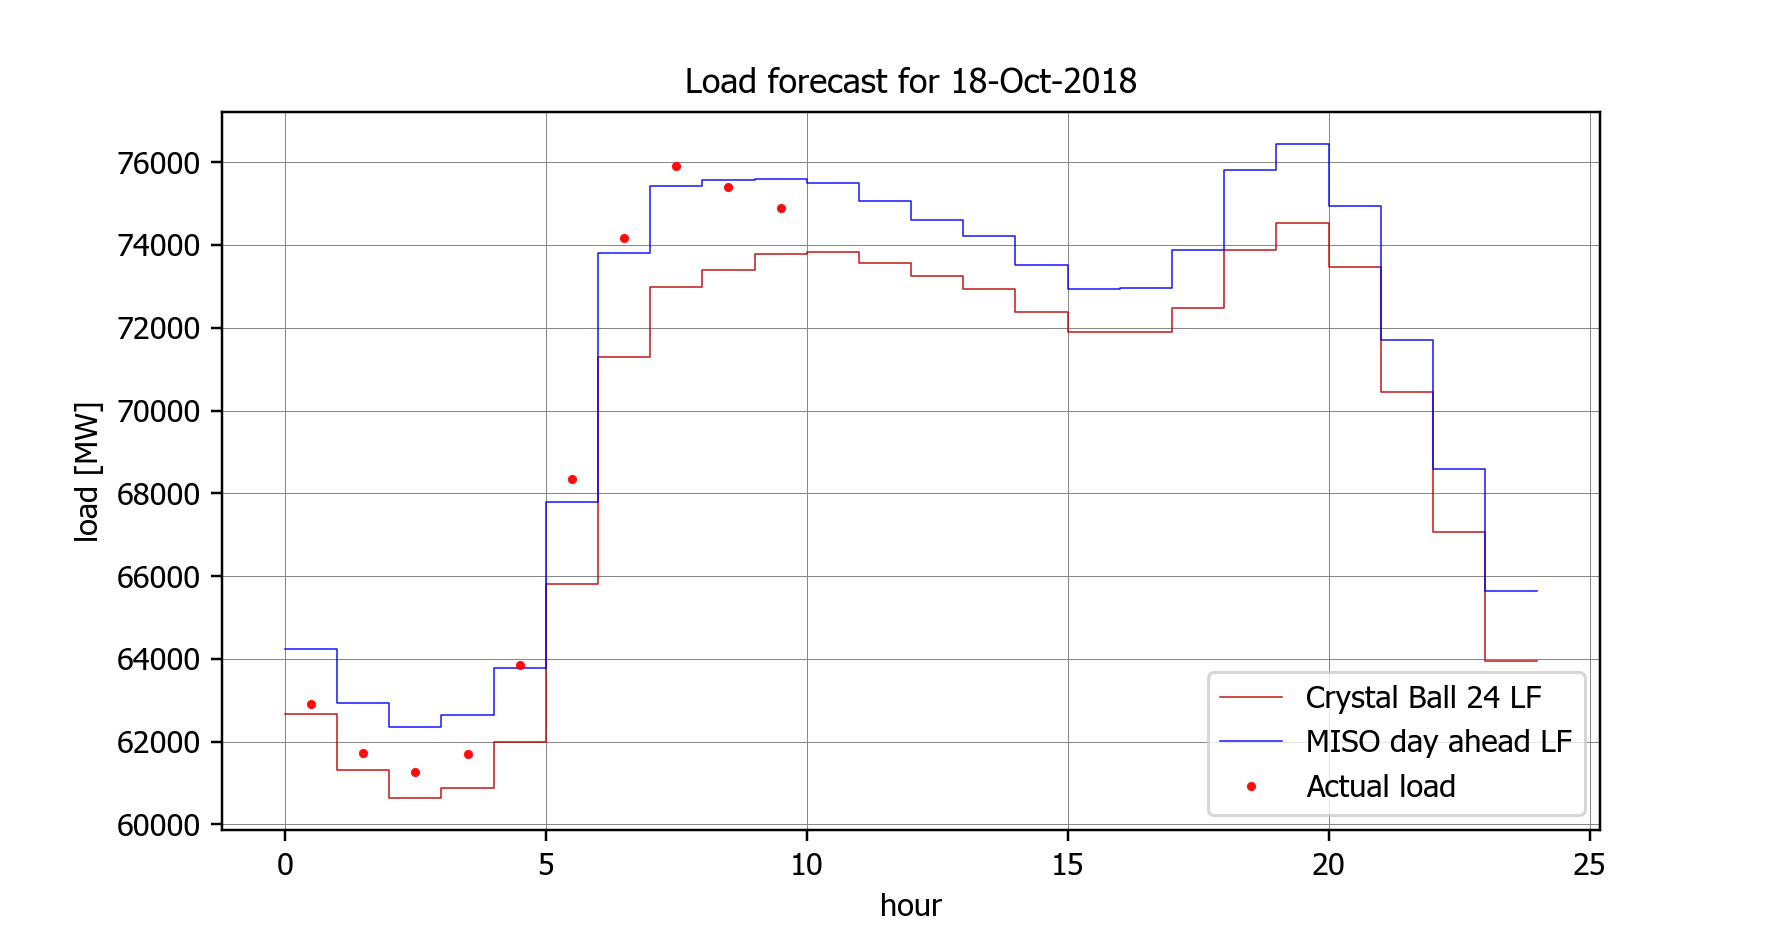

In [5]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
import matplotlib.pyplot as plt

pred = lf_data.prediction.values
miso = lf_data.lf_miso.values

hours = [h for h in range(0, pred.shape[0]+1)]
hours_actual = [h-0.5 for h in hours_actual]
pred = [pred[0],] + [p for p in pred]
miso = [miso[0],] + [m for m in miso]

plt.figure(1, figsize=(8,4.2))
plt.title("Load forecast for " + today.strftime('%d-%b-%Y'), fontsize=11)
plt.step(hours, pred, '-', color=(0.75,0,0), linewidth=0.5, alpha=0.9, label='Crystal Ball 24 LF')
plt.step(hours, miso, '-', color='blue', linewidth=0.5, alpha=0.9, label='MISO day ahead LF')
plt.plot(hours_actual, actual, '.', color='red', markersize=4, alpha=0.9, label='Actual load')
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.xlabel('hour')
plt.ylabel('load [MW]')
plt.legend(loc='lower right')
plt.show()